In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('./dataset/Chapter2_data.CSV', encoding='utf-8')
X = df.iloc[:, [1, 2]].values

In [3]:
test_data = [
    [0.2, 0.1],
    [0.4, 0.7],
    [0.5, 0.8],
]

In [4]:
_k = 4
_cluster_init = 'k-means++'
_iter_count = 100
_max_iter = 300
_tol  = 0.0001

In [5]:
kmeans_model = KMeans(n_clusters=_k, init=_cluster_init, n_init=_iter_count, max_iter=_max_iter, tol=_tol)
kmeans_model.fit(X)

KMeans(n_clusters=4, n_init=100)

In [6]:
kmeans_model.labels_

array([1, 3, 1, 0, 0, 2, 2, 0, 3, 1, 0, 2, 3, 0, 0, 0, 3, 2, 0, 3, 0, 2,
       1, 3, 1, 0])

In [10]:
final_centroids = kmeans_model.cluster_centers_

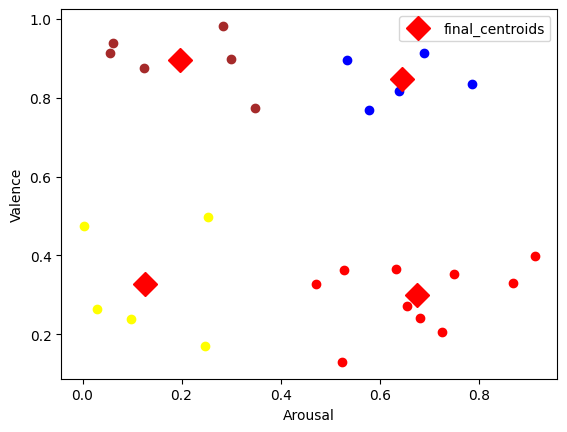

In [13]:
for number, i in enumerate(X):
    if (kmeans_model.labels_[number] == 0):
        plt.scatter(i[0], i[1], c='red')
    elif (kmeans_model.labels_[number] == 1):
        plt.scatter(i[0], i[1], c='blue')
    elif (kmeans_model.labels_[number] == 2):
        plt.scatter(i[0], i[1], c='yellow')
    elif (kmeans_model.labels_[number] == 3):
        plt.scatter(i[0], i[1], c='brown')

plt.plot(final_centroids[:, 0], final_centroids[:, 1], 'rD', markersize=12, label='final_centroids')
plt.xlabel("Arousal")
plt.ylabel("Valence")
plt.legend()
plt.show()

In [15]:
final_centroids, test_data

(array([[0.67504164, 0.29880381],
        [0.64509659, 0.84705834],
        [0.12634319, 0.32856275],
        [0.19592406, 0.89729128]]),
 [[0.2, 0.1], [0.4, 0.7], [0.5, 0.8]])

In [16]:
def TestResult(final_centroids, test_data):
    cluster_index = []
    for i in test_data:
        cluster_index.append(kmeans_model.predict([i]))
    return cluster_index

In [17]:
cluster_index = TestResult(final_centroids, test_data)

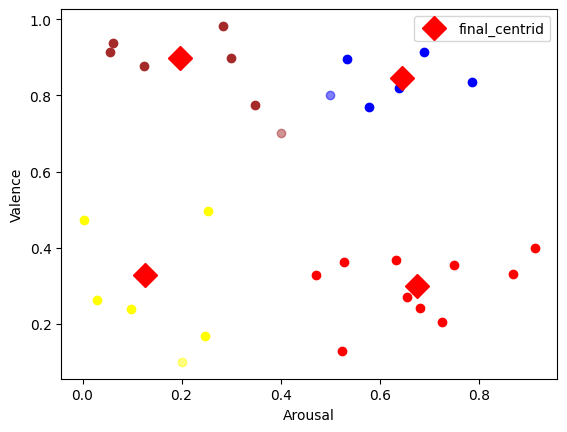

In [20]:
for number, i in enumerate(X):
    if (kmeans_model.labels_[number] == 0):
        plt.scatter(i[0], i[1], c='red')
    elif (kmeans_model.labels_[number] == 1):
        plt.scatter(i[0], i[1], c='blue')
    elif (kmeans_model.labels_[number] == 2):
        plt.scatter(i[0], i[1], c='yellow')
    elif (kmeans_model.labels_[number] == 3):
        plt.scatter(i[0], i[1], c='brown')

for i, t in enumerate(test_data):
    if (cluster_index[i] == 0):
        plt.scatter(t[0], t[1], c='red', alpha=0.5)
    elif (cluster_index[i] == 1):
        plt.scatter(t[0], t[1], c='blue', alpha=0.5)
    elif (cluster_index[i] == 2):
        plt.scatter(t[0], t[1], c='yellow', alpha=0.5)
    elif (cluster_index[i] == 3):
        plt.scatter(t[0], t[1], c='brown', alpha=0.5)

plt.plot(final_centroids[:,0], final_centroids[:,1], 'rD', markersize=12, label = 'final_centrid')
plt.xlabel('Arousal')
plt.ylabel('Valence')
plt.legend()
plt.show()